<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 01 - Classification: Eckelmans needs you!   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin [ASC]   (anne-sophie.collin@uclouvain.be)<br><br>
Cécile Hautecoeur [CH]    (cecile.hautecoeur@uclouvain.be)<br> <br>
Guillaume Van Dessel [GVD] (guillaume.vandessel@uclouvain.be)<br><br>
Loïc Van Hoorebeeck [LVH]  (loic.vanhoorebeeck@uclouvain.be)<br> <br>
<div style="text-align: right"> Version 5 (26 October 2020)</div>

<br><br>
</font>

<br>

<font size=7 color=#009999> ECKELMANS NEEDS YOU! </font> <br><br> 

<br>
<font size=5 color=#009999> 1.1 CONTEXT </font> <br>
</font>

Eckelmans is hiring... This well known estate agency in Louvain-la-Neuve wants now to become a leader for houses renting in every campus around the world! To achieve their objective, they need a data scientist to develop a tool that predicts the house quality based on some information (features) available in the Eckelmans database. Here is a description of the dataset: <br><br>


<table style="width:67%">
            <thead>
                <tr>
                    <th style="width:18%"> Feature Name</th>
                    <th> Description </th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="color:red"> <b> OverallQual </b> </td>
                    <td style="color:red"> <b>  Rates the overall quality and finish of the house (from 1-Very Poor to 10-Very Excellent)   </b>      </td>
                </tr>                
                <tr>
                    <td> SalePrice </td>
                    <td> Sale price of the property </td>
                </tr>
                <tr>
                    <td> LotFrontage </td>
                    <td> Linear feet of street connected to property </td>
                </tr>
                <tr>
                    <td> OverallCond </td>
                    <td> Rates the overall condition of the house (from 1-Very Poor to 10-Very Excellent) </td>
                </tr>
                <tr>
                    <td> LotArea </td>
                    <td> Lot size in square feet </td>
                </tr>
                <tr>
                    <td> YearBuilt </td>
                    <td> Original construction date </td>
                </tr>
                <tr>
                    <td> YearRemodAdd </td>
                    <td> Remodel date (same as construction date if no remodeling or additions) </td>
                </tr>
                <tr>
                    <td> MasVnrArea </td>
                    <td> Masonry veneer area in square feet </td>
                </tr>
                <tr>
                    <td> BsmtUnfSF </td>
                    <td> Unfinished square feet of basement area </td>
                </tr>
                <tr>
                    <td> TotalBsmtSF </td>
                    <td> Total square feet of basement area </td>
                </tr>
                <tr>
                    <td> 1stFlrSF </td>
                    <td> First Floor square feet </td>
                </tr>
                <tr>
                    <td> 2ndFlrSF </td>
                    <td> Second floor square feet </td>
                </tr>
                <tr>
                    <td> GrLivArea </td>
                    <td> Above grade (ground) living area square feet </td>
                </tr>
                <tr>
                    <td> TotRmsAbvGrd </td>
                    <td> Total rooms above grade (does not include bathrooms) </td>
                </tr>
                 <tr>
                    <td> GarageArea </td>
                    <td> Size of garage in square feet </td>
                </tr>
                <tr>
                    <td> OpenPorchSF </td>
                    <td> Open porch area in square feet </td>
                </tr>
                <tr>
                    <td> EnclosedPorch </td>
                    <td> Enclosed porch area in square feet </td>
                </tr>
                <tr>
                    <td> 3SsnPorch </td>
                    <td> Three season porch area in square feet </td>
                </tr>
                <tr>
                    <td> ScreenPorch </td>
                    <td> Screen porch area in square feet </td>
                </tr>
                <tr>
                    <td> PoolArea </td>
                    <td> Pool area in square feet </td>
                </tr>
            </tbody>
    </table>      
<br>

The objective is to predict the overall quality stored in the column named `OverallQual`.


<br>
<font size=5 color=#009999> 1.2 IMPORT THE DATA </font> <br>
<font size=4 color=#009999>
BASIC PANDAS TOOLS
</font> <br> <br>

Pandas is an open-source Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Those data structures are designed to handle common data processing operations. <br><br>

First, let's import the dataset and display some basic information. 

In [1]:
import pandas as pd


# After talking with the business section of Eckelman, we decide to keep 19 selected features.

keepFeature = ['OverallQual', 'LotFrontage', 'SalePrice', 'OverallCond', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
               'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 
               'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea']
fullData = pd.read_csv("house_prices.csv")
data     = fullData[keepFeature]
data.to_csv('HousePrices19Features.csv', index=False)

data = pd.read_csv('HousePrices19Features.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   SalePrice      1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  TotRmsAbvGrd   1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  OpenPorchSF    1460 non-null   int64  
 16  EnclosedPorch  1460 non-null   int64  
 17  3SsnPorch      1460 non-null   int64  
 18  ScreenPo

,OverallQual,LotFrontage,SalePrice,OverallCond,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,7,65.0,208500,5,8450,2003,2003,196.0,150,856,856,854,1710,8,548,61,0,0,0,0
1,6,80.0,181500,8,9600,1976,1976,0.0,284,1262,1262,0,1262,6,460,0,0,0,0,0
2,7,68.0,223500,5,11250,2001,2002,162.0,434,920,920,866,1786,6,608,42,0,0,0,0
3,7,60.0,140000,5,9550,1915,1970,0.0,540,756,961,756,1717,7,642,35,272,0,0,0
4,8,84.0,250000,5,14260,2000,2000,350.0,490,1145,1145,1053,2198,9,836,84,0,0,0,0


<font size=5 color=#009999> 1.3 - DATA EXPLORATION </font> <br>
<font size=4 color=#009999>
PLOTLY AS VISUALIZATION TOOL 
</font> <br> <br>

<div class="alert alert-warning">
    In the following plots, we are going to compare the target, <code>OverallQual</code>, with respect to all the other features. Are there features more interesting than others? <b>Select the three best features</b>, motivate briefly your choice.
</div> 

You can change the variable `cols`, if you want to display less or more images in each row.


In [2]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)




all_boxes  = []
cols = 3

fig = make_subplots(rows=len(data.columns) // cols + 1, cols=cols, shared_yaxes=True)
for idx, label in enumerate(data): 
    temp = go.Scatter(
                x      = data[label],
                y      = data['OverallQual'],
                name   = label,
                mode   = 'markers',
                marker = dict(color = 'rgba(50,160,150,0.7)', line = dict(color = 'rgb(0,0,0)', width = 1.5)),
                text   = label,
                showlegend = False
    )

    row = idx // cols + 1
    col = idx % cols + 1
    fig.append_trace(temp, row=row , col=col)
    fig.update_xaxes(title_text=label, row=row, col=col)
    if col == 1:
        fig.update_yaxes(title_text="OverallQual", row=row, col=col)

fig.update_layout(title_text="Features vs. target", height=10000/cols)
fig.show()

### Comment : 
We are looking for the strongest correlations between overallqual and a feature. It's hard to see it on those graph, we should use a correlation matrix to have better information to compare features.

Comparing all the plots is a tedious task, we would like to have all the information on the same graph! Hopefully, we can use the **correlation matrix**, as a tool to visually show all the correlation between features.

<div class="alert alert-warning">
    Check that the three best features you chose in the previous question are the good ones.
</div>

In [3]:
X         = [label for label in data]
N         = data.shape[1]
corr      = (data.corr()).values
# Display the correlation in cells
hovertext = [[f'corr({X[i]}, {X[j]})= {corr[i][j]:.2f}' for j in range(N)] for i in range(N)]

sns_colorscale = [[0.0, '#3f7f93'], 
 [0.071, '#5890a1'],
 [0.143, '#72a1b0'],
 [0.214, '#8cb3bf'],
 [0.286, '#a7c5cf'],
 [0.357, '#c0d6dd'],
 [0.429, '#dae8ec'],
 [0.5, '#f2f2f2'],
 [0.571, '#f7d7d9'],
 [0.643, '#f2bcc0'],
 [0.714, '#eda3a9'],
 [0.786, '#e8888f'],
 [0.857, '#e36e76'],
 [0.929, '#de535e'],
 [1.0, '#d93a46']]


heat = go.Heatmap(z=data.corr(),
                  x=X,
                  y=X,
                  zmin=-1,
                  zmax=1,
                  xgap=1, ygap=1,
                  colorscale=sns_colorscale,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext=hovertext,
                  hoverinfo='text'
                   )



title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)  
fig.show() 

We have strong correlations between OverallQual and :
- SalePrice : r=0.79 
- GrLivArea : r=0.59
- YearBuilt : r=0.57 
<br>
Negative correlations shouldn't be discarded it simply means that as the feature grows the target shrinks. A correlations of -1 is a strong correlation !

<div class="alert alert-block alert-info">
<b>Note on the practicality of pandas:</b> <br>
    Pandas is a really powerful tool, which should be in every data scientist's toolbox. <br>
    You'll find below a simple example, showing that by default pandas implicitly discards NaN values. Using pearson correlation throws a <samp>ValueError</samp> exception.<br>
    Remark that there are multiple ways of dealing with missing values, this will be discussed in the last section of this document.
</div>


In [4]:
from scipy.stats import pearsonr


print("Correlation between OverallQual and SalePrice is %s " % corr[0, 2])
print("Using scipy.stats we get %s " % pearsonr(data['OverallQual'], data['SalePrice'])[0])
try:
    print("\n Let's test the robustness, what if we have NaN? \n")
    print("Correlation between OverallQual and LotFrontage is %s " % corr[0, 1])
    print("Using scipy.stats we get %s " % pearsonr(data['OverallQual'], data['LotFrontage'])[0])
except ValueError as e:  # We catch the error to avoid running error and to allow us to run the whole notebook :)
    print("ValueError: ", e)


Correlation between OverallQual and SalePrice is 0.7909816005838047 
Using scipy.stats we get 0.7909816005838052 

 Let's test the robustness, what if we have NaN? 

Correlation between OverallQual and LotFrontage is 0.25164577548061245 
ValueError:  array must not contain infs or NaNs


### Comments :
You can't find a correlation between a number and an undefined value, therefore you get a ValueError. You can often find NaN values or infs in dataset because data haven't been measured. Therefore, we preprocess our data to either discard rows with NaN values or you can replace them by the median or the mean.

<br>
<font size=5 color=#009999> 2 - FEATURE SELECTION </font> <br>
<font size=4 color=#009999> 
REDUCE THE NUMBER OF FEATURES BY SELECTING THE MOST RELEVANT ONES
</font> <br> <br>

Modern day datasets are very rich in information due to the simplicity of the data collection process.
This makes the data high dimensional and it is quite common to see datasets with hundreds of features. <br>


 

Feature Selection/Extraction aims to reduce the number of dimensions while minimizing information loss. When presented data have very high dimensionality, models usually choke because:
   - Training time increases exponentially with number of features. Resources need also to be allocated for uninformative features. 
   - Models have increasing risk of overfitting with increasing number of features (curse of dimensionality). Uninformative features then act as noise for the machine learning model that can perform terribly poorly.
    
**Feature selection** is "the process of selecting a subset of relevant features for processing, without any transformation". Such methods consider the relationship between features and the target variable to compute the importance of features. In this exercice session, we will quantify this relation by the use of the correlation between each variable and the target variable.

 

**Feature extraction** "aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features)". This new reduced set of features should then be able to summarize most of the information contained in the original set of features. A classical way to perform feature extraction is to use a dimensionality reduction tool such as the principal component analysis (PCA).

 

<img src="dimensionality_reduction.jpg" width = "250">

 

<div class="alert alert-warning">    
    You are asked to implement <b>feature selection</b> by selecting the features that are the 5 most correlated - in absolute value - to the target variable.<br>
    Do the same with the 12 most correlated features.
</div>

Note: the function <samp>corrwith</samp> from the <samp>pandas</samp> library may be useful. 






In [5]:
data = pd.read_csv('HousePrices19Features.csv')

# Remove features with NaN, nothing to do here :)
data.drop(['LotFrontage'], axis=1, inplace=True)
data.drop(['MasVnrArea'], axis=1, inplace=True)

# TODO: select the 5 (or 12) most correlated features.
# we remove OverallQual because we would get a correlation value of 1 that isn't useful.

biggest_5 = abs(data.corrwith(data['OverallQual'], axis=0)).drop('OverallQual').nlargest(5)
biggest_12 = abs(data.corrwith(data['OverallQual'],axis=0)).drop('OverallQual').nlargest(12)

print("{}\n\n{}".format(biggest_5, biggest_12))

SalePrice       0.790982
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
dtype: float64

SalePrice        0.790982
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
YearRemodAdd     0.550684
TotalBsmtSF      0.537808
1stFlrSF         0.476224
TotRmsAbvGrd     0.427452
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
EnclosedPorch    0.113937
dtype: float64


<br>
<font size=5 color=#009999> 3 - FEATURE STANDARDIZATION  </font><br>
<font size=4 color=#009999>
A MATTER OF UNITS...
</font> <br> <br>


Unfortunately, due to the COVID crisis, Eckelman's revenues have drastically reduced, and we are forced to work with the following features: `SalePrice`, `LotArea`, and `OverallQual`.

Three of your friends -- and young data scientists -- **A**lice, **B**ob and **S**tanley have been assigned the tedious task of Eckelman's classification: given the sale price and the area of a house, they have to predict whether the quality of that house is high or low.

They already agreed on the model classifier: a simple K-nearest neigbhors (K-NN) should be enough. However, they strongly disagree on which units to use.

- Alice is from the United States of **A**merica and would rather use the imperial system of units. Besides, the original data is given in square feet (sq. ft) and US dollars (USD).
- Bob comes from Syldavia, where the currency is the **B**itcoin (XBT) and the surface is expressed in square smoot.
- Stanley does not want to pick a side: he chose to **S**tandardize the data.
    


---

<div class="alert alert-block alert-info">
<b>Smoot:</b> 
The smoot is a nonstandard, humorous unit of length created as part of an MIT fraternity prank. It is named after Oliver R. Smoot (...), who in October 1958 lay down repeatedly on the Harvard Bridge  (between Boston and Cambridge, Massachussetts) so that his fraternity brothers could use his height to measure the length of the bridge.<br><br>
     <a href="https://en.wikipedia.org/wiki/Smoot">Source</a> of this useless information :-)
</div>



---

### Intuition :
Scales will impact the model, if a feature has a larger scale than another one it could direct the model into a classification primarly based on the first feature.

<br>
<font size=5 color=#009999> 3.1 - DATA IMPORT </font> <br>
</font> 
<div class="alert alert-warning">
Create numpy arrays containing the features of interests. Here, we will consider that the <i>target variable</i>, $y$, is a binary variable equals to <b>zero</b> if the <code>OverallQual</code> is evaluated to five or less, and <b>one</b> otherwise. You may want to have a look to pandas' <a href="https://scikit-learn.org/stable/modules/preprocessing.html">preprocessing</a> package for Stanley's data.
</div>


In [6]:
import numpy as np 
from sklearn import preprocessing



data = pd.read_csv("house_prices.csv")


#print(data)

data = data.head(50)

# Creating new columns for Bob's data

data['LotAreaB'] = data['LotArea']*0.0320782
data['SalePriceB'] = data['SalePrice']/10000

# Feature matrix (numpy.ndarray) of the three friends

X_data_A = np.array(data[['LotArea','SalePrice']])
X_data_B = np.array(data[['LotAreaB','SalePriceB']])
X_data_S = preprocessing.scale(X_data_A)

# Target, where condition is true, yields 0 otherwise yields 1. Binarization of the target for a given threshold.
y = np.where(data['OverallQual']<=5,0,1)

#check that we only have 0s and 1s.
print(y)

[1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 0]


<br>
<font size=5 color=#009999> 3.2 - MODELS </font> <br>
</font> 

To compare the three approaches, you need to evaluate the quality of each of them. For binary classification an easy assessment of quality is to compute the percentage of well-classified data. To evaluate a method, you could train the models and compute the training quality. But in this case, a "method" that simply memorized the data would have a perfect score but is unable to generalize. However, your goal is to classify data with unknown label. Therefore, you should test the models on data that where not been used during training. It is therefore usefull to split your dataset into two parts: one for training and one for testing.


<div class="alert alert-warning">
    In order to get familiar with sklearn philosophy, let's start with a simple exercise: we implemented for you a (dummy) separation in train and test sets. Use the train set to <b>fit</b> a K-NN (with default parameter), <b>predict</b> the result of your fitted model on the test set and finally, compute the <b>score</b> of your model. 
</div>



### Comment :
We could check for a zero-R classifier what the score would be to give ourselves a baseline. For example if 80% of the data are 1. A classifier that only says yes would have a score of 80%. Any method getting a lower value than that wouldn't be very useful. You could compute the F1-score to prove that zero-R is actually quite bad because it would get a recall of 1 but a lower accuracy. More on that in hack4.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Dummy separation into train and test sets
n_a, _ = X_data_A.shape

n_train = n_a // 2
n_test = n_a - n_train

X_train = X_data_A[0:n_train, :]
y_train = y[0:n_train]

X_test = X_data_A[n_train:, :]
y_test = y[n_train:]


# TODO: create your K-NN classifier
clf = KNeighborsClassifier()


# TODO: fit your classifier on your train set
fitted_train_set = clf.fit(X_train,y_train)

# TODO: predict the output of the test set
y_pred = clf.predict(X_test)

# Personnal thing :
counts = np.bincount(y_train)
print(f"most common value in y_train : {np.argmax(counts)}")
y_zeroR = np.array([np.argmax(counts)]*len(y_pred))

print('True test values are', np.array(y_test))
print('Predicted values are', y_pred)
print('ZeroR', y_zeroR)
# Here we simply compute the score :)
score = np.sum(np.equal(y_pred, np.array(y_test)))/n_test
score_0R = np.sum(np.equal(y_zeroR, np.array(y_test)))/n_test

print('Percentage of well-classified points ', score)
print('Percentage of well-classified points with zero-R ',score_0R)

most common value in y_train : 1
True test values are [1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0]
Predicted values are [1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0]
ZeroR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Percentage of well-classified points  0.76
Percentage of well-classified points with zero-R  0.36




<div class="alert alert-warning">
    Now, create a function <code>fit_model(X, y, clf)</code> that takes as arguments: the data, the objective/target, and a classifier. This function trains the classifier on 70% of the data and tests it on the remaining 30%. This function should return the classifier, the training data and objective, the testing data and objective as well as the score obtained by the classifier. You should use <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>train_test_split</a> with <code>random_state=42</code> to do a <b>clever</b> separation into train and test sets.
   </div>

In the packages `helping_functions`, we implemented for you `vis_clf`, a function that allows to visualize the results of a classifier provided the data (see the signature of the function for more details).

<div class="alert alert-block alert-info">
<b>Note on fixing the seed:</b> <br>
    Having your computer to generate <i>true</i> random number (RN) is not as simple as it sounds. Such numbers can be generated from physical environment attributes which are, in practice, impossible to predict (CPU temperature, current time, user's mouse movements, ...) but such generation is expensive in term of execution time, and therefore not suited for simulations. <br><br>
    Hence, the "random" numbers used in practice are in fact <b>pseudo-random numbers</b> (PRN) generated from a single RN, the <b>seed</b>. These PRN are <i>not</i> truly random, but pass most statistic tests. <br><br>
    Fixing the seed is a good practice to have when implementing non-deterministic functions: this ensures that each run will be equivalent, and greatly simplify the debugging. <br><br>
    The following code illustrates this concept.
</div>



In [8]:
# Nothing to do in this cell :)

import random

print("The 10 following numbers should change at every run")

random.seed(None)
s = 42

for i in range(10):
    print(random.randint(0, 42))
    
print("Fixing the seed to %s " % s)
random.seed(s)

for i in range(10):
    print(random.randint(0, 42))
print("These numbers should be the same at each run: 40, 7, \
1, 17, 15, 14, 8, 6, 34, 5")

The 10 following numbers should change at every run
12
39
41
24
8
20
40
23
39
9
Fixing the seed to 42 
40
7
1
17
15
14
8
6
34
5
These numbers should be the same at each run: 40, 7, 1, 17, 15, 14, 8, 6, 34, 5


In [9]:
from sklearn.model_selection import train_test_split

""" -----------------------------------------------------------------------------------------
Split the data into training (70%) and test (30%) set and fit the model using the training set
INPUT: 
    - X: initial features
    - y: initial objective
    - clf: classifier
OUTPUT:
    - clf: fitted classifier
    - X_train: training set
    - y_train: training objective
    - X_test: test set
    - y_test: test objective
    - score: mean accuracy on the test data.
----------------------------------------------------------------------------------------- """
def fit_model(X, y, clf):   
 
    # split between train and test sets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    fitted = clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    n_test = len(X_test)
    score = np.sum(np.equal(y_pred, np.array(y_test)))/n_test
    
    return clf, X_train, y_train, X_test, y_test, score


<div class="alert alert-warning">
Create a model with 5 neighbors and distance-based weights and visualize its performances, you can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNeighborsClassifier</a> from <code>sklearn</code>.
</div>

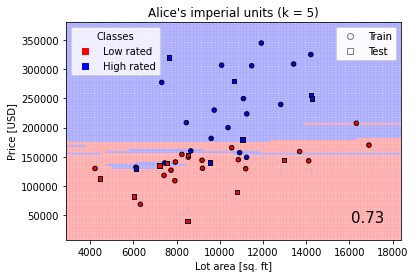

0.7333333333333333


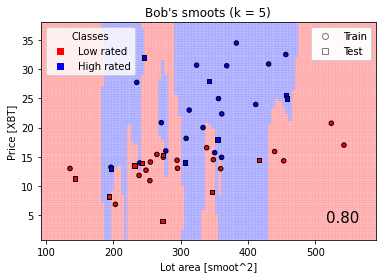

0.8


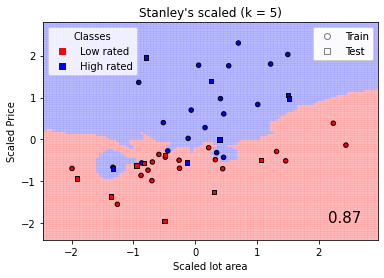

0.8666666666666667


In [10]:
from helping_functions import vis_clf

%matplotlib inline

# Create labels
names = ['Alice\'s imperial units', 'Bob\'s smoots', 'Stanley\'s scaled']
x_labels = ['Lot area [sq. ft]', 'Lot area [smoot^2]', 'Scaled lot area']
y_labels = ['Price [USD]', 'Price [XBT]', 'Scaled Price']


# TODO: Build model
# 5 by default but more explicit to write it down :) 
clf = KNeighborsClassifier(n_neighbors=5, weights= 'distance')

# Create a dictionary X_dic with `names` as keys and your data as values.

X_dic = {'Alice\'s imperial units': X_data_A, 'Bob\'s smoots': X_data_B, 'Stanley\'s scaled': X_data_S}


for (name, x_label, y_label) in zip(names, x_labels, y_labels):    
    
    X = X_dic[name]    
    clf, X_train, y_train, X_test, y_test, score = fit_model(X,y,clf)
    vis_clf(clf,X, X_train, y_train, X_test, y_test, score, 5,title=name, x_label=x_label, y_label=y_label)
    print(score)

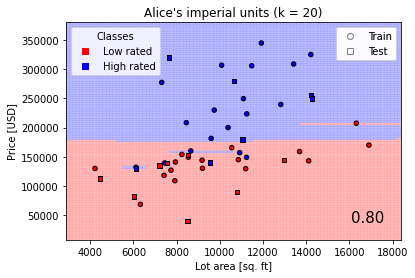

0.8


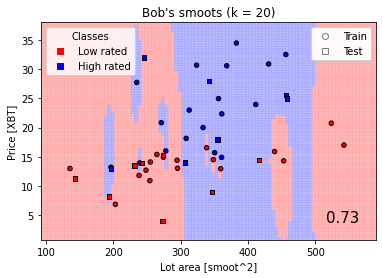

0.7333333333333333


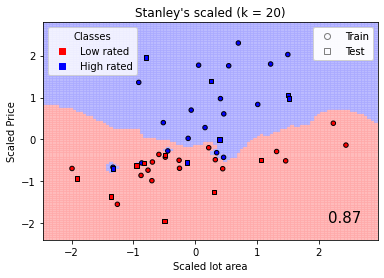

0.8666666666666667


In [11]:
from helping_functions import vis_clf

%matplotlib inline

# Create labels
names = ['Alice\'s imperial units', 'Bob\'s smoots', 'Stanley\'s scaled']
x_labels = ['Lot area [sq. ft]', 'Lot area [smoot^2]', 'Scaled lot area']
y_labels = ['Price [USD]', 'Price [XBT]', 'Scaled Price']


# TODO: Build model

clf = KNeighborsClassifier(n_neighbors=20,weights= 'distance')

# Create a dictionary X_dic with `names` as keys and your data as values.

X_dic = {'Alice\'s imperial units': X_data_A, 'Bob\'s smoots': X_data_B, 'Stanley\'s scaled': X_data_S}


for (name, x_label, y_label) in zip(names, x_labels, y_labels):    
    
    X = X_dic[name]    
    clf, X_train, y_train, X_test, y_test, score = fit_model(X,y,clf)
    vis_clf(clf,X, X_train, y_train, X_test, y_test, score, 20,title=name, x_label=x_label, y_label=y_label)
    print(score)

<br>
<font size=5 color=#009999> 3.3 - Analysis </font> <br>
</font> 

<div class="alert alert-warning">
Compare the three plots, and explain the differences. Which of the three versions would you choose?

Play with the parameter `n_neighbors`, how do the plots change?

Rerun the code on the whole data, and interpret the results for the scaled version.
</div>

## Comments : 
### k = 5 :
#### First graph : 
We can observe that the classifier builds an horizontal separation because the range of the Y-axis is a lot bigger than the X-axis. Therefore it foccuses on y-values to classify the values. The score isn't bad, but we could do better with scaled values. 
#### Second graph :
Same explanation as the first graph but we have the X-axis that has a larger scale and therefore is dominant. 
#### Third graph :
We can observe that the border is not as straight as the first two ones because we have scaled the values with the preprocessing step. We also get a better accuracy of 0.87. 

### k = 20 :
Observations are the same one as k=5, but we have a smoother classifier. If we were to do it with n_neighbors=1 we would get sharp angles. Because a blue point will get the area around him and the same for red. We can observe that down below. 

**In conclusion, the way-to-go is with k big enough and with scaled data to avoid foccussed classifying on 1 feature.**  

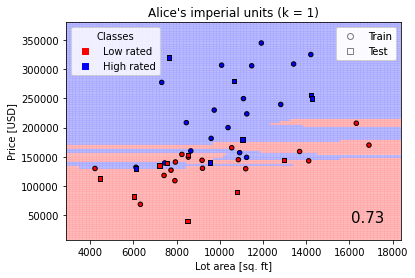

0.7333333333333333


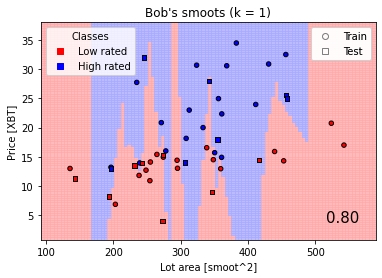

0.8


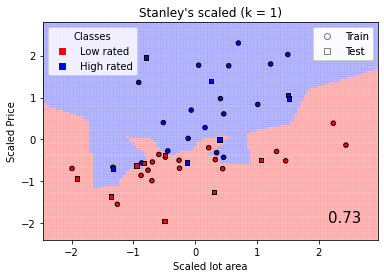

0.7333333333333333


In [12]:
from helping_functions import vis_clf

%matplotlib inline

# Create labels
names = ['Alice\'s imperial units', 'Bob\'s smoots', 'Stanley\'s scaled']
x_labels = ['Lot area [sq. ft]', 'Lot area [smoot^2]', 'Scaled lot area']
y_labels = ['Price [USD]', 'Price [XBT]', 'Scaled Price']


# TODO: Build model

clf = KNeighborsClassifier(n_neighbors=1,weights= 'distance')

# Create a dictionary X_dic with `names` as keys and your data as values.

X_dic = {'Alice\'s imperial units': X_data_A, 'Bob\'s smoots': X_data_B, 'Stanley\'s scaled': X_data_S}


for (name, x_label, y_label) in zip(names, x_labels, y_labels):    
    
    X = X_dic[name]    
    clf, X_train, y_train, X_test, y_test, score = fit_model(X,y,clf)
    vis_clf(clf,X, X_train, y_train, X_test, y_test, score, 1,title=name, x_label=x_label, y_label=y_label)
    print(score)

<br>
<font size=5 color=#009999> 4 - DATA COMPLETION </font> <br>
</font> 

Finally, Eckelman could invest in a third feature: the `LotFrontage`. 
- `LotFrontage`: the amount of streets connected to property in feet

Unfortunately, this feature is incomplete and cannot be used directly. To improve your algorithm you have therefore two choices: either you neglect the incomplete data, or you try to fill them with clever inputs, in this case the mean or the median.

Note that you should also use the two features from previous section: `SalePrice` and `LotArea`.

<div class="alert alert-warning">
    Before implementing these two choices, let's analyze the feature <code>LotFrontage</code>: visualize the statistics of this variable using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">pandas.describe </a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html">pandas.boxplot </a>. Do you think that there is a better approach <i>a priori</i>?
</div>

count     42.000000
mean      72.095238
std       19.498355
min       33.000000
25%       60.000000
50%       70.000000
75%       84.000000
max      115.000000
Name: LotFrontage, dtype: float64


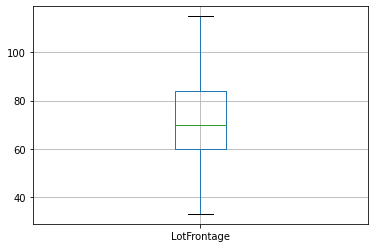

In [13]:
%matplotlib inline 

# For visualization purpose, we work with the 50 first observations
data = pd.read_csv("house_prices.csv")
data = data.head(50)

print(data["LotFrontage"].describe())

boxplot = data.boxplot(column=['LotFrontage'])

### Comments : 
We have 42 non-null values out of 50, mean and median are quite similar 72 $\approx$ 70. If we want to imput on NaN values, result shouldn't differ from median imputation to mean imputation. We can either discard NaN values or replace them with mean or median before classifying.

<br>
<font size=5 color=#009999> 4.1 - "KEEP IT ALL OR DROP IT ALL" APPROACH </font> <br>
</font> 

<div class="alert alert-warning">
In this first approach, you will neglect data with missing values. To do so, remove all data with missing <code>LotFrontage</code>, and indicate how much data you are removing. 

You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a> function from pandas. <br>
    Use functions created in section 3.2 (<code>fit_model</code> and <code>vis_clf</code>) and observe your results. Do not forget to standardize your data! Is your classifier better than in previous section? Why is it so?
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> 
You can observe that the data considered in the previous section can be seen as a "keep it all drop it all" approach as well: in this case you dropped all the features with missing elements (instead of dropping all data with missing features).
</div>
<div class="alert alert-block alert-info">
<b>Note 2:</b> 
The instruction %matplotlib notebook allows you to manipulate the plot. Note however that only one figure can be manipulated in the notebook! Therefore you should re-run a cell if you want to manipulate its image. (Zoom on the image can be done using right clic).
</div>

8


<IPython.core.display.Javascript object>


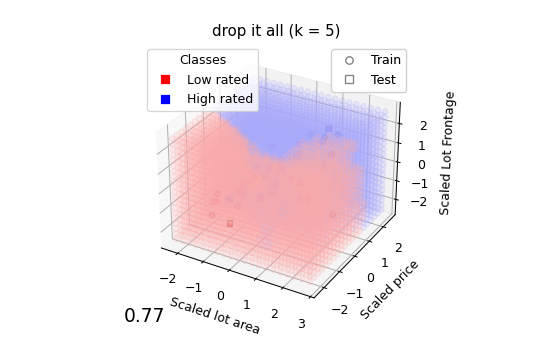

0.7692307692307693


In [18]:
%matplotlib notebook

data2 = data[['LotArea', 'SalePrice', 'LotFrontage','OverallQual']]

# removing missing data :
data_full = data2.dropna(axis=0)

# scaling the data :
scaled_data2 = preprocessing.scale(np.array(data_full[['LotArea', 'SalePrice', 'LotFrontage']]))

# computing number of missing values
nbr_of_missing_values = len(data2)-len(data_full)

# it should be 8 as in the previous question we have seen that we have 42 values out of 50
print(nbr_of_missing_values)

X = scaled_data2
y = np.where(data_full['OverallQual']<=5,0,1)

# creating the classifier :
clf = KNeighborsClassifier(n_neighbors=5,weights= 'distance')

clf, X_train, y_train, X_test, y_test, score = fit_model(X,y,clf)
vis_clf(clf,X, X_train, y_train, X_test, y_test, score, 5,title="drop it all", x_label="Scaled lot area", y_label="Scaled price")
print(score)

### Comments :
We get worst result than before, we might lose to much information by dropping all NA values.

<br>
<font size=5 color=#009999> 4.2 - FILLING APPROACH </font> <br>
<font size=4 color=#009999> MEAN </font> <br>
</font> 

<div class="alert alert-warning">
    Now, we will try to fill the missing values with the mean of <code>Lot Frontage</code>. For this purpose, you should use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html">fillna</a>  and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a> functions of pandas. Do the completion before the standardization.  


Again, observe and comment what you obtain in this case. 
</div>
 

<IPython.core.display.Javascript object>


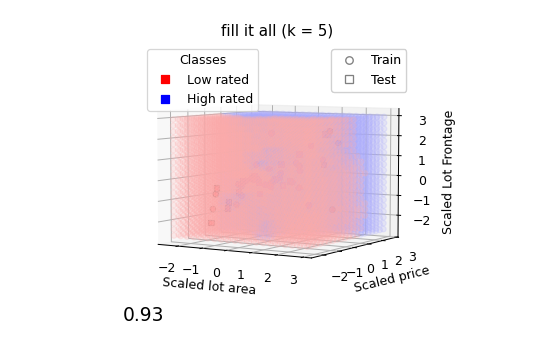

0.9333333333333333


In [19]:
%matplotlib notebook

data2 = data[['LotArea', 'SalePrice', 'LotFrontage','OverallQual']]

# computing mean for each and ignoring missing values in the process
mean = data2.mean(axis=0,skipna=True)

# filling missing data :
data_full = data2.fillna(value=mean, axis=0)

# scaling the data :
scaled_data2 = preprocessing.scale(np.array(data_full[['LotArea', 'SalePrice', 'LotFrontage']]))

X = scaled_data2
y = np.where(data_full['OverallQual']<=5,0,1)

# creating the classifier :
clf = KNeighborsClassifier(n_neighbors=5,weights= 'distance')

clf, X_train, y_train, X_test, y_test, score = fit_model(X,y,clf)
vis_clf(clf,X, X_train, y_train, X_test, y_test, score, 5,title="fill it all", x_label="Scaled lot area", y_label="Scaled price")
print(score)

### Comments :
We have a better score with the filling of values.

<br>
<font size=5 color=#009999> 4.3 - FILLING APPROACH </font> <br>
<font size=4 color=#009999> MEDIAN </font> <br>
</font> 
<div class="alert alert-warning">

Finally, we try to fill the missing values with the median of `Lot Frontage`. For this purpose, you should use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html">fillna</a>  and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html">median</a> functions of pandas. 

Again, observe and comment what you obtain in this case. Was your hypothesis about the best approach for data completion correct? 
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> 
There exist other ways to fill the missing data, using for example information about the neighboring points, but this is out of the scope of this course. :) 
</div>


<IPython.core.display.Javascript object>


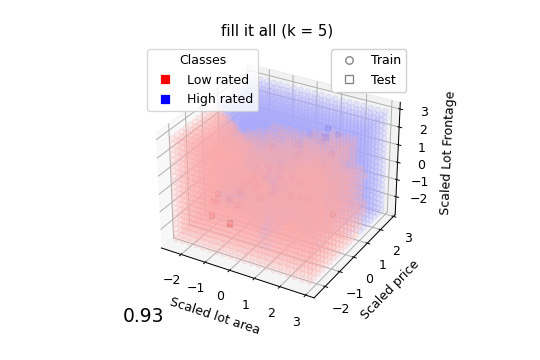

0.9333333333333333


In [20]:
%matplotlib notebook

data2 = data[['LotArea', 'SalePrice', 'LotFrontage','OverallQual']]

# computing mean for each and ignoring missing values in the process
median = data2.median(axis=0,skipna=True)

# filling missing data :
data_full = data2.fillna(value=median, axis=0)

# scaling the data :
scaled_data2 = preprocessing.scale(np.array(data_full[['LotArea', 'SalePrice', 'LotFrontage']]))

X = scaled_data2
y = np.where(data_full['OverallQual']<=5,0,1)

# creating the classifier :
clf = KNeighborsClassifier(n_neighbors=5,weights= 'distance')

clf, X_train, y_train, X_test, y_test, score = fit_model(X,y,clf)
vis_clf(clf,X, X_train, y_train, X_test, y_test, score, 5,title="fill it all", x_label="Scaled lot area", y_label="Scaled price")
print(score)

### Comments : 
As stated before, because the mean and median values are quite similar the result is the same. 